# Independent Explorations 3

## 1. Importing libraries, data set, and initial checks.
## 2. CPI and CPI change as correlated with the total number of and final worth of billionaires in a country.
## 3. Revisiting heatmap from my 'visualizations' notebook to try to solve number appearance.
## 4. Categorical data explorations

### 1. Importing libraries, data set, and initial checks.

In [41]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

In [42]:
# To display charts in the notebook without calling them

%matplotlib inline

In [43]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6'

In [44]:
# Import data frame

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'billionaires_cleaned.csv'), index_col = False)

In [45]:
# Removing the limit to the number of columns shown

pd.options.display.max_columns = None

In [6]:
df.head()

,Unnamed: 0,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0
1,1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0
2,2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
3,3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
4,4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0


In [7]:
# Removing the extra index column

df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0


### 2. In the notebook "Independent Explorations 1," I began to look at each country's CPI and CPI change. Now I want to look at the CPI and CPI change as correlated with the total number of and final worth of billionaires in a country.

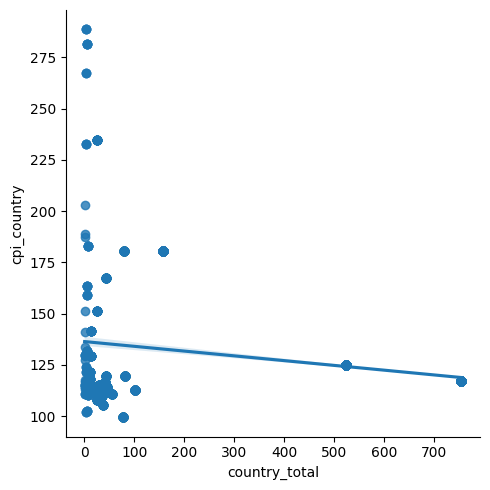

In [9]:
sns.lmplot(x = 'country_total', y = 'cpi_country', data = df)

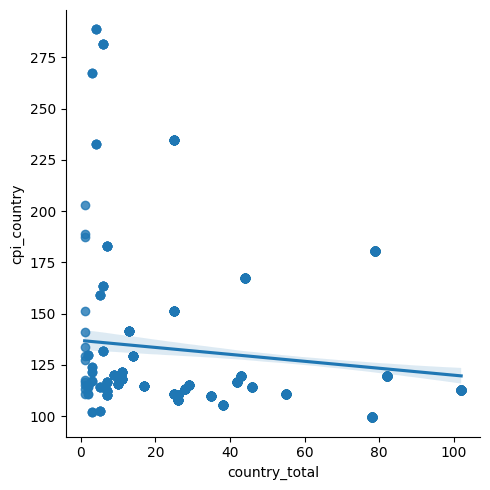

In [10]:
# What happens if we remove the three big outliers?

# Filter the data frame to exclude 'country_total' numbers over 140
filtered_df = df[df['country_total'] <= 140]

# Create the lmplot with the filtered data frame
sns.lmplot(x='country_total', y='cpi_country', data=filtered_df)

### There is a negative correlation between the number of billionaires in a country and the consumer price index in that country: as the cpi goes down, the number of billionaires goes up, which makes sense. However, many of the data points are not near the regression line.

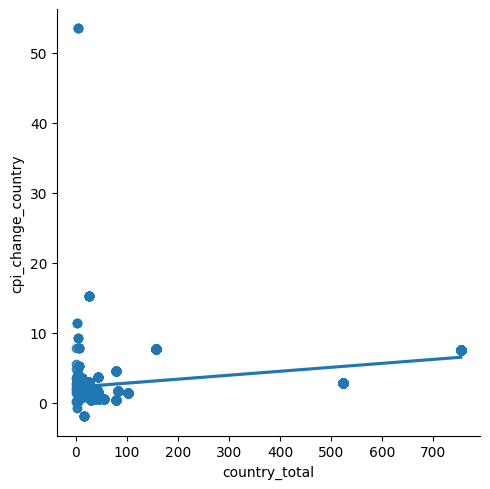

In [11]:
sns.lmplot(x = 'country_total', y = 'cpi_change_country', data = df)

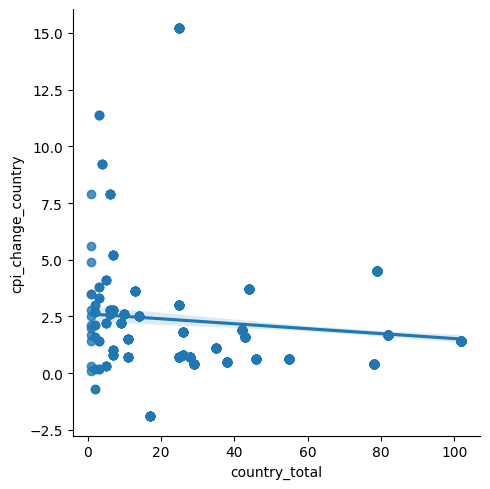

In [12]:
# What happens if we remove the bigest outliers?

# Filter the data frame to exclude 'country_total' numbers over 140 and 'cpi_change_country' numbers over 40.
filtered_df = df[(df['country_total'] <=140) & (df['cpi_change_country'] < 40)]


# Create the lmplot with the filtered data frame
sns.lmplot(x='country_total', y='cpi_change_country', data=filtered_df)

### There is also a negative correlation between the number of billionaires in a country and the change in consumer price index in that country: as the cpi change goes down, the number of billionaires goes up, which makes sense. However, many of the data points are not near the regression line.

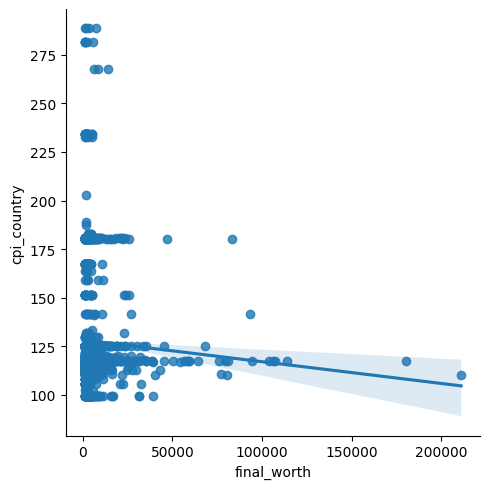

In [13]:
sns.lmplot(x = 'final_worth', y = 'cpi_country', data = df)

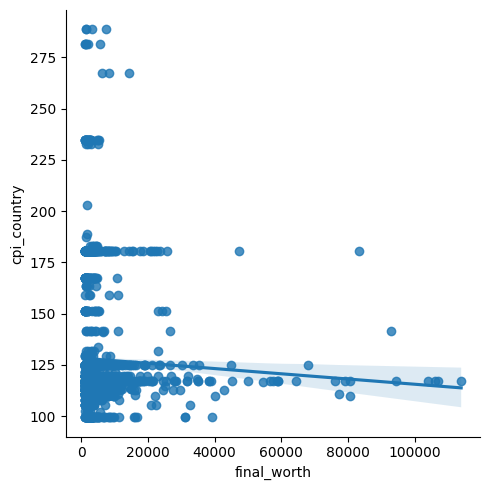

In [14]:
# What happens if we remove the two final_worth outliers?

# Filter the data frame to exclude 'final_worth' numbers over 150000
filtered_df = df[df['final_worth'] <= 150000]

# Create the lmplot with the filtered data frame
sns.lmplot(x='final_worth', y='cpi_country', data=filtered_df)

### There is a slightly negative correlation between final worth and the consumer price index in a country: as final worth goes up, cpi goes down. This also makes sense, however the correlation is weak and most data points are not near the line.

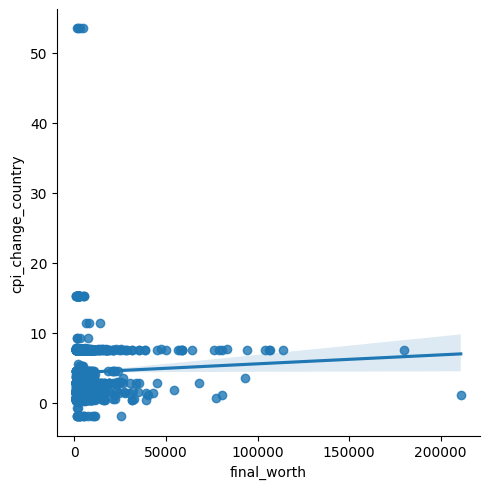

In [15]:
sns.lmplot(x = 'final_worth', y = 'cpi_change_country', data = df)

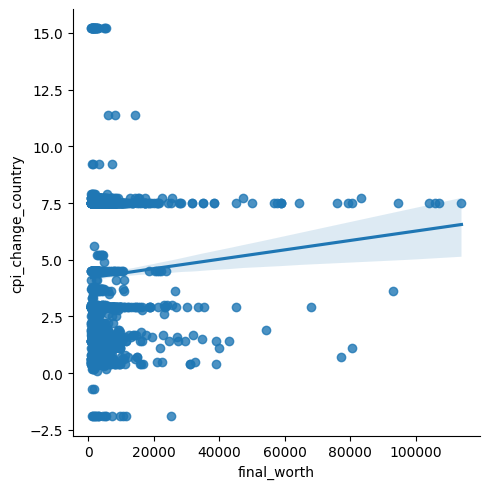

In [16]:
# Filter the data frame to exclude 'final_worth' numbers over 150000 and 'cpi_change_country' numbers over 40.
filtered_df = df[(df['final_worth'] <=150000) & (df['cpi_change_country'] < 40)]


# Create the lmplot with the filtered data frame
sns.lmplot(x='final_worth', y='cpi_change_country', data=filtered_df)

### There is a positive correlation between final worth and the change in CPI. As CPI change increases, the final_worth of billionaires increases also. However, most points are far from the regression line and so the correlation isn't strong.

### 3. Revisiting the heatmap from my "visualizations" notebook to see if I can solve the issue with the numbers only appearing in the first row of the heatmap.

In [17]:
# Create a subset excluding the string variables and 'cpi_change_country', 'total_tax_rate_country', 'latitude_country', and 'longitude_country'

sub = df[['final_worth', 'age', 'cpi_country', 'gdp_country', 'tertiary_ed_enroll', 'primary_ed_enroll', 'life_expectancy_country', 
         'population_country']]

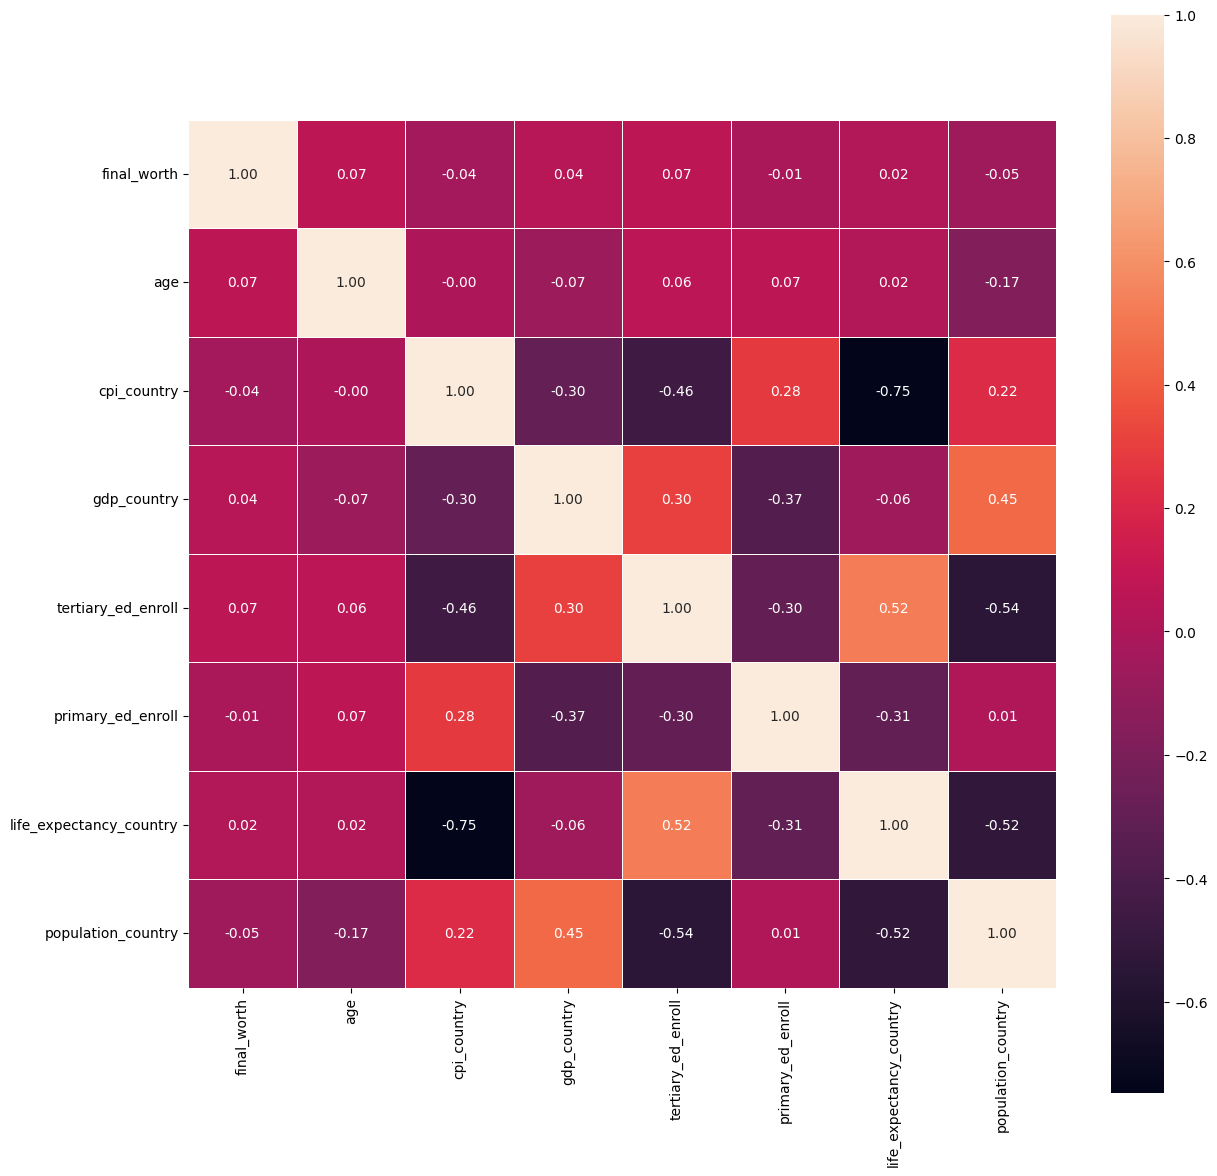

In [18]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(14, 14))

# Create the correlation heatmap in seaborn by applying a heatmap onto subplot defined above.
corr = sns.heatmap(sub.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, annot_kws={"size": 10})

# Adjust the aspect ratio of the heatmap
ax.set_aspect("equal")

### 4. Now, I will look at some categorical data.

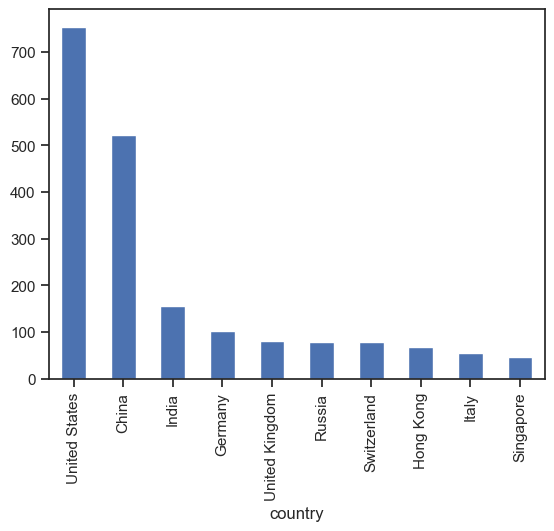

In [68]:
# Top 10 countries for number of billionaires
# I had some help in chatGPT in filtering for the top 10.

top_countries = df['country'].value_counts().nlargest(10) # Get top 10 countries
bar1 = top_countries.plot.bar() 

In [71]:
print(top_countries)

country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Russia             79
Switzerland        78
Hong Kong          68
Italy              55
Singapore          46
Name: count, dtype: int64


In [20]:
bar1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_top_10_countries.png'))

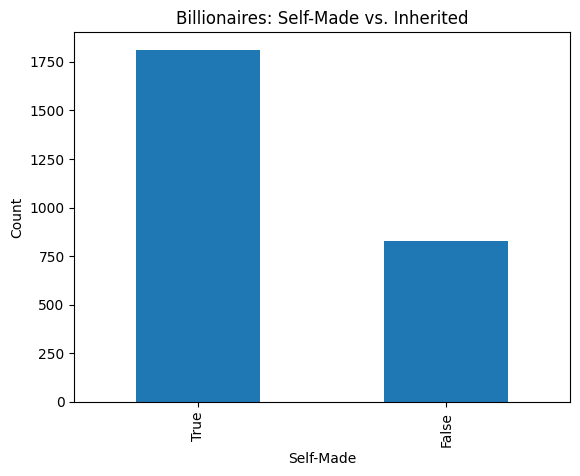

In [31]:
# Bar chart for self-made billionaires vs those who inherited their wealth

# Generate the bar plot
bar2 = df['self_made'].value_counts().plot.bar()

# Customize axis labels and title
plt.xlabel('Self-Made')
plt.ylabel('Count')
plt.title('Billionaires: Self-Made vs. Inherited')

# Show the plot
plt.show()


In [27]:
self_made_counts = df['self_made'].value_counts()
print(self_made_counts)

self_made
True     1812
False     828
Name: count, dtype: int64


### There are more than twice as many self_made billionaires than there are those who inherited their wealth.

In [32]:
bar2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_self_made.png'))

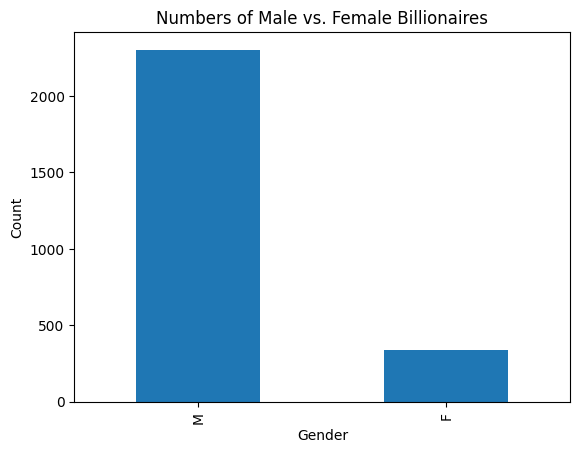

In [37]:
# Bar chart for Male vs Female billionaires

# Generate the bar plot
bar3 = df['gender'].value_counts().plot.bar()

# Customize axis labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Numbers of Male vs. Female Billionaires')

# Show the plot
plt.show()

In [38]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
M    2303
F     337
Name: count, dtype: int64


In [39]:
2303/337

6.833827893175074

### There are over 6 times more male billionaires than female.

In [40]:
bar3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_gender.png'))

In [48]:
# Create for loop and new column for 'wealth_category'

result = []

for value in df['final_worth']:
    if value <2000:
        result.append ("<2B")
    elif value >=2000 and value <3000:
        result.append ("2-<3B")
    elif value >=3000 and value <4000:
        result.append ("3-<4B")
    elif value >=4000 and value <5000:
        result.append ("4-<5B")
    elif value >=5000 and value <10000:
        result.append ("5-<10B")
    elif value >=10000 and value <50000:
        result.append ("10-<50B")
    else:
        result.append (">=50B")

In [49]:
result

['>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '>=50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '10-<50B',
 '

In [52]:
df['wealth_category'] = result

In [53]:
df['wealth_category'].value_counts(dropna = False)

wealth_category
<2B        1066
2-<3B       548
5-<10B      369
3-<4B       306
4-<5B       169
10-<50B     159
>=50B        23
Name: count, dtype: int64

In [59]:
1066+548+369+306+169+159+23

2640

In [61]:
# Create for loop and new column for 'age_category'

result = []

for value in df['age']:
    if value <25:
        result.append ("very young")
    elif value >=25 and value <40:
        result.append ("young")
    elif value >=40 and value <60:
        result.append ("middle-aged")
    elif value >=60 and value <80:
        result.append ("old")
    else:
        result.append ("very old")

In [62]:
result

['old',
 'middle-aged',
 'middle-aged',
 'old',
 'very old',
 'old',
 'very old',
 'very old',
 'old',
 'old',
 'old',
 'middle-aged',
 'very old',
 'middle-aged',
 'old',
 'young',
 'very old',
 'old',
 'old',
 'old',
 'old',
 'old',
 'middle-aged',
 'old',
 'very old',
 'young',
 'very old',
 'very old',
 'very old',
 'middle-aged',
 'very old',
 'very old',
 'very old',
 'middle-aged',
 'old',
 'middle-aged',
 'young',
 'middle-aged',
 'old',
 'old',
 'old',
 'old',
 'very old',
 'old',
 'middle-aged',
 'very old',
 'very old',
 'old',
 'very old',
 'old',
 'old',
 'old',
 'middle-aged',
 'old',
 'old',
 'old',
 'old',
 'middle-aged',
 'middle-aged',
 'middle-aged',
 'very old',
 'old',
 'middle-aged',
 'very old',
 'very old',
 'very old',
 'old',
 'very old',
 'old',
 'old',
 'middle-aged',
 'old',
 'old',
 'young',
 'middle-aged',
 'old',
 'very old',
 'old',
 'middle-aged',
 'old',
 'very old',
 'old',
 'old',
 'middle-aged',
 'middle-aged',
 'old',
 'middle-aged',
 'middle-aged

In [63]:
df['age_category'] = result

In [64]:
df['age_category'].value_counts(dropna = False)

age_category
old            1278
middle-aged     848
very old        447
young            62
very young        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Age and Wealth Categorical Plot')

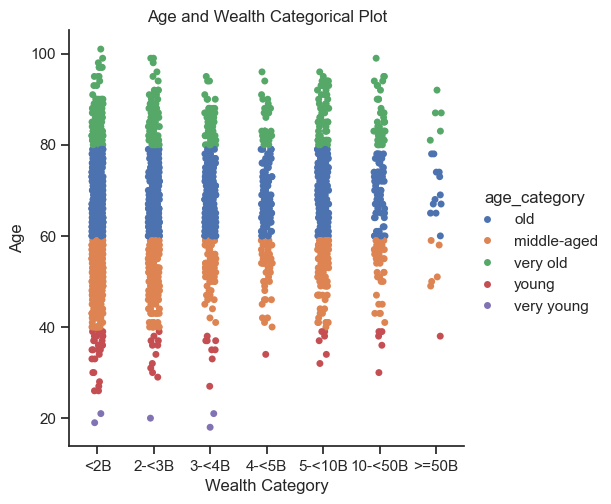

In [66]:
# Create a categorical plot in seaborn using the age and wealth categories created above
# I received help from chatGPT for ordering the x axis labels 

# Define the desired order for x-axis labels
x_order = ["<2B", "2-<3B", "3-<4B", "4-<5B", "5-<10B", "10-<50B", ">=50B"]

# Create a categorical plot in seaborn using the age and wealth categories created above
sns.set(style="ticks")
g = sns.catplot(x="wealth_category", y="age", hue="age_category", data=df, order=x_order)

# Customize axis labels and title
plt.xlabel('Wealth Category')
plt.ylabel('Age')
plt.title('Age and Wealth Categorical Plot')

In [67]:
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'plot_wealth_age.png'))

Text(0.5, 1.0, 'Gender and Wealth Categorical Plot')

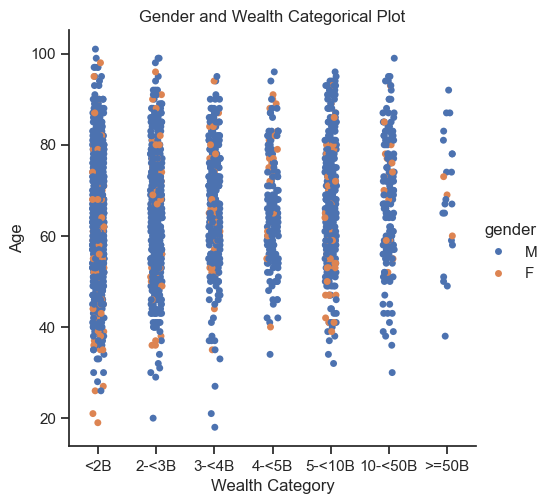

In [82]:
# Create a scatterplot using the variables wealth_category and age, colored by gender

# Define the desired order for x-axis labels
x_order = ["<2B", "2-<3B", "3-<4B", "4-<5B", "5-<10B", "10-<50B", ">=50B"]

# Create a categorical plot in seaborn using the age and wealth categories created above
sns.set(style="ticks")
g = sns.catplot(x="wealth_category", y="age", hue="gender", data=df, order=x_order)

# Customize axis labels and title
plt.xlabel('Wealth Category')
plt.ylabel('Age')
plt.title('Gender and Wealth Categorical Plot')

In [83]:
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'plot_wealth_gender.png'))

In [79]:
# Look at the percentages of males vs. females in each wealth category.
# I had help from chatGPT on code for calculating percentages

# Group the dataframe by 'wealth_category' and 'gender', then count the occurrences
gender_counts = df.groupby(['wealth_category', 'gender']).size().unstack()

# Calculate the total count within each wealth category
total_counts = gender_counts.sum(axis=1)

# Calculate the percentages
gender_percentages = gender_counts.div(total_counts, axis=0) * 100

# Print out the gender percentages for each wealth category
print(gender_percentages)


gender                   F          M
wealth_category                      
10-<50B          11.949686  88.050314
2-<3B            11.678832  88.321168
3-<4B            11.437908  88.562092
4-<5B            13.609467  86.390533
5-<10B           15.989160  84.010840
<2B              12.570356  87.429644
>=50B            13.043478  86.956522


In [80]:
# Define the desired order for wealth categories
desired_order = ["<2B", "2-<3B", "3-<4B", "4-<5B", "5-<10B", "10-<50B", ">=50B"]

# Reindex the DataFrame using the desired order
gender_percentages = gender_percentages.reindex(desired_order)

# Print out the gender percentages for each wealth category with the desired order
print(gender_percentages)


gender                   F          M
wealth_category                      
<2B              12.570356  87.429644
2-<3B            11.678832  88.321168
3-<4B            11.437908  88.562092
4-<5B            13.609467  86.390533
5-<10B           15.989160  84.010840
10-<50B          11.949686  88.050314
>=50B            13.043478  86.956522


### The spread of males and females within each wealth category, do not vary greatly. Females range from 11.4% to 16% and males range from 84% to 88.6%

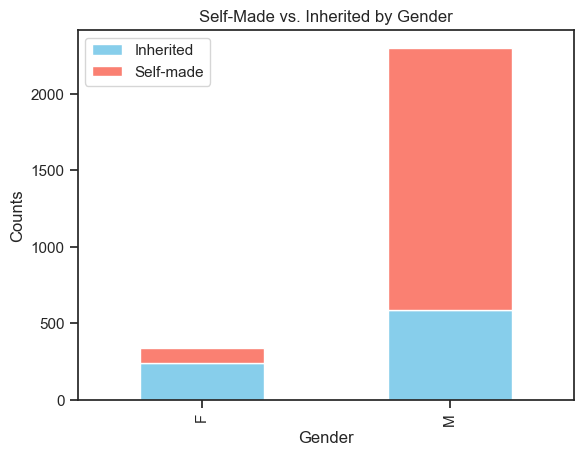

In [81]:
# Stacked bar chart showing the self-made vs inherited sources of wealth for males and females

# Group the dataframe by 'gender' and 'self_made', then count the occurrences
stacked_data = df.groupby(['gender', 'self_made']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Customize axis labels and title
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Self-Made vs. Inherited by Gender')

# Customize legend
plt.legend(['Inherited', 'Self-made'])

In [86]:
# Look at the percentages of self-made vs iherited wealth by gender.

# Group the dataframe by 'self_made' and 'gender', then count the occurrences
self_made = df.groupby(['gender', 'self_made']).size().unstack()

# Calculate the total count within each wealth category
total_counts = self_made.sum(axis=1)

# Calculate the percentages
self_made_percentages = self_made.div(total_counts, axis=0) * 100

# Print out the gender percentages for each wealth category
print(self_made_percentages)

self_made      False      True 
gender                         
F          71.513353  28.486647
M          25.488493  74.511507


### Males are much more likely to be self-made billionaires than females are.

Text(0.5, 1.0, 'Age Distribution of Billionaires')

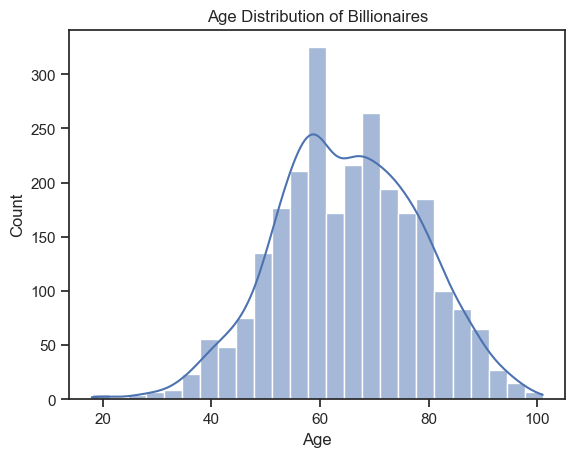

In [90]:
# Use a histogram to visualize the distribution of ages. 

sns.histplot(df['age'], bins = 25, kde = True)
# Customize axis labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Billionaires')

### Most billionaires fall roughly between ages 50 and 83.

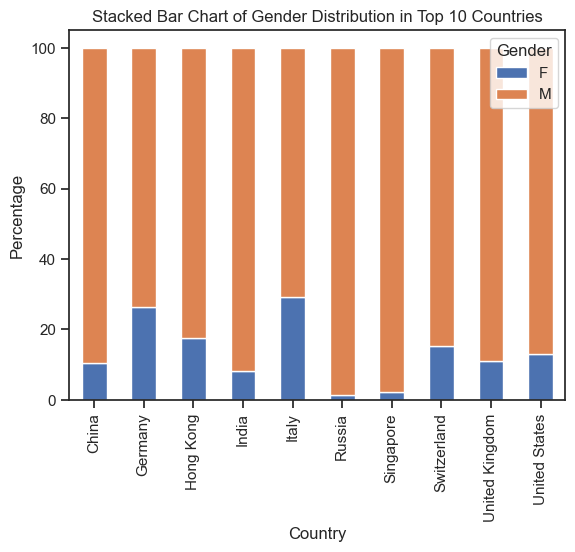

In [91]:
# Stacked bar chart for the percentages of male and female billionaires in each of the top 10 countries
# I received help from chatGPT in creating the following code

# Get the top 10 countries
top_countries = df['country'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the data for the top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Group the filtered DataFrame by 'country' and 'gender', then count the occurrences
stacked_data = df_top_countries.groupby(['country', 'gender']).size().unstack()

# Calculate the percentages
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True)

# Customize axis labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Gender Distribution in Top 10 Countries')

# Customize legend
plt.legend(title='Gender')

In [92]:
stacked_data

gender,F,M
country,,
China,10.325048,89.674952
Germany,26.470588,73.529412
Hong Kong,17.647059,82.352941
India,8.280255,91.719745
Italy,29.090909,70.909091
Russia,1.265823,98.734177
Singapore,2.173913,97.826087
Switzerland,15.384615,84.615385
United Kingdom,10.975610,89.024390


In [94]:
# Export data frame

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'billionaires_updated1.csv'))